In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
kaggle_visible_evaluation = pd. read_csv("kaggle_visible_evaluation_triplets.txt", sep="\t",names=['user_id','song_id','freq'])

In [3]:
kaggle_visible_evaluation.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
unique_tracks = pd. read_csv("unique_tracks.txt",sep='<SEP>',names= ['track_id','song_id','artist_name','title'])

In [5]:
unique_tracks.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
song_df = pd.merge(kaggle_visible_evaluation,unique_tracks.drop_duplicates(['song_id']), on="song_id", how="left")


In [7]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


**Let's delete the unnessery columns**

In [8]:
song_df.drop(['track_id'],axis=1, inplace=True)

# Final data is

In [9]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [10]:
song_df.columns          # to know the column names in the data

Index(['user_id', 'song_id', 'freq', 'artist_name', 'title'], dtype='object')

In [11]:
song_df.shape            # to the shape of the data

(1450933, 5)

In [12]:
print('Total number of observations are:',song_df.shape[0])

Total number of observations are: 1450933


### Let's check is there any missing values ###

In [13]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
artist_name    0
title          1
dtype: int64

- There is 1 missing value in the release column data. let's drop that row

In [14]:
song_df.dropna(inplace=True)

In [15]:
song_df.shape

(1450932, 5)

In [16]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   title        1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


- In the given data 4 are object type (**Categorical columns**) columns and 1 is int type(**Numaric type**)

### Let's look in to column by column 

## Univariate analysis

#### user 

In [17]:
print('Total number of users in the data are :',song_df.user_id.nunique())

Total number of users in the data are : 110000


In [18]:
song_df.user_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.user_id.value_counts().sort_values(ascending=False).head()

47a071056348c235b14ca6ba26ac921aeade06b8    5
91b5f0bb4b47239bf9beb80c9235aaa71fd9be7a    5
7bcd4adb98bd523f91b5223bb42fb682ff18c887    5
44de3b51efc758df9b76e0ead600385619908e7a    5
7c34bf969e626e4bb69e84511ceffcb972a0b839    5
Name: user_id, dtype: int64

**************************************************


7d90be8dfdbde170f036ce8a4b915440137cb11c    53
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
d30e18323f15426c3cdc8585252ed34459916f51    52
Name: user_id, dtype: int64

In [19]:
user = pd.DataFrame(song_df.user_id.value_counts())

In [20]:
user[(user.user_id>20) & (user.user_id<31)]

,user_id
1bfabea890929432c8a83a2c59fee2c4ddf85e59,30
275d440c68f3bd4b545092039a9de48ba44ee997,30
4cb592be863dd975ea978d7c6769b6d85969dbaf,30
f1caa8fdc8ab6bc260cb5fc88170f11e3da3f2dc,30
a68c3b3b044b4494e6f6407ed6fc547caa529fc9,30
...,...
38d7a88b75ea484b6b95acfdb2bdd848c28af436,21
0e244fb9e4ce23bd18edc41431637eb4aded83b5,21
5d06b3104ca97b3f59339b9cc75eb9702edd5ebf,21
3dc1f82ad75ed118f984febcbe8652c503082048,21


In [21]:
user_less_then_5 = list(user[user.user_id <6].index)
Between_6_to_10 = list(user[(user.user_id >5)&(user.user_id <11)].index)
Between_11_to_20 = list(user[(user.user_id >10)&(user.user_id<21)].index)
Between_21_to_30 = list(user[(user.user_id >20)&(user.user_id<31)].index)
Between_31_to_40 = list(user[(user.user_id >30)&(user.user_id<41)].index)
Between_41_to_50 = list(user[(user.user_id >40)&(user.user_id<51)].index)
user_more_then_5 = list(user[user.user_id >50].index)

In [22]:
user_data = {'less_then_5': len(user_less_then_5),\
            "Between_6_to_10":len(Between_6_to_10),\
            'Between_11_to_20':len(Between_11_to_20),\
            'Between_21_to_30':len(Between_21_to_30),\
            'Between_31_to_40':len(Between_31_to_40),\
            'Between_41_to_50':len(Between_41_to_50),\
            'user_more_then_5':len(user_more_then_5)}

In [23]:
user_data

{'less_then_5': 13097,
 'Between_6_to_10': 41221,
 'Between_11_to_20': 36179,
 'Between_21_to_30': 14392,
 'Between_31_to_40': 4525,
 'Between_41_to_50': 574,
 'user_more_then_5': 12}

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 7 artists>

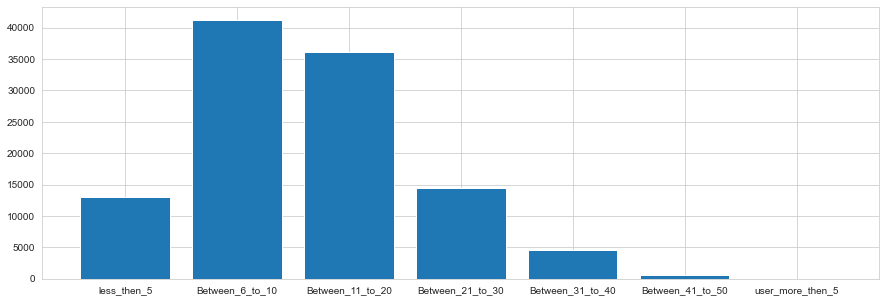

In [24]:
plt.figure(figsize=(15,5))
keys = user_data. keys()
values = user_data. values()
plt. bar(keys, values)


- As we are seeing the people who are listing songs in B/W 6 to 10 are more in the data

- From above one we can say that every user is listing minimum of **5** songs
- maximum number fo songs listed by single user in the given data is **53** songs

### song id

In [25]:
print('Total number of unique songs in the data are :',song_df.song_id.nunique())

Total number of unique songs in the data are : 163205


In [26]:
song_df.song_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.song_id.value_counts().sort_values(ascending=False).head()

SOPIVSP12A6701C0AA    1
SOYDELO12A8C1349AA    1
SOEWNNH12A8C1389AE    1
SOHETDB12A6D4F82D0    1
SOLXYMJ12AB018650F    1
Name: song_id, dtype: int64

**************************************************


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
Name: song_id, dtype: int64

- **song id SOFRQTD12A81C233C0 is the highest number of listed song in the data.**
- **There are some songs that are just listned once by user**

In [27]:
(song_df.song_id.value_counts()==1).sum()

64746

In [28]:
song_info = pd.DataFrame(song_df.song_id.value_counts())

In [29]:
song_info.head()

,song_id
SOFRQTD12A81C233C0,5043
SOAUWYT12A81C206F1,4483
SOBONKR12A58A7A7E0,4136
SOAXGDH12A8C13F8A1,3780
SOSXLTC12AF72A7F54,3672


In [30]:
song_info[song_info.song_id==1]

,song_id
SOIJGFU12AB017B6E3,1
SONULYM12A8C13434C,1
SOVXGLJ12A58A7DBDE,1
SOAQGSK12AB01864DF,1
SOBQMFR12A8C13A164,1
...,...
SOGJDKL12A8C136EB0,1
SODVPYI12AB017B0D2,1
SOZMYOO12AB0184816,1
SOGRQPA12A8C13517E,1


In [31]:
(song_info[song_info.song_id==1].shape[0]/song_info.shape[0])*100

39.67157868937839

- **In the given data there are 64746 songs that are just once by the user in the entire data. This value is nearly 40% in the total songs.**

In [32]:
song_info[song_info.song_id>1000].index

Index(['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0',
       'SOAXGDH12A8C13F8A1', 'SOSXLTC12AF72A7F54', 'SONYKOW12AB01849C9',
       'SOEGIYH12A6D4FC0E3', 'SODJWHY12A8C142CCE', 'SOLFXKT12AB017E3E0',
       'SOFLJQZ12A6D4FADA6', 'SOUSMXX12AB0185C24', 'SOUVTSM12AC468F6A7',
       'SOHTKMO12AB01843B0', 'SOTWNDJ12A8C143984', 'SOWCKVR12A8C142411',
       'SOBOUPA12A6D4F81F1', 'SOOFYTN12A6D4F9B35', 'SOPUCYA12A8C13A694',
       'SOVDSJC12A58A7A271', 'SOPPROJ12AB0184E18', 'SOKLRPJ12A8C13C3FE',
       'SOPTLQL12AB018D56F', 'SOUFTBI12AB0183F65', 'SODGVGW12AC9075A8D',
       'SOBOAFP12A8C131F36', 'SOSCIZP12AB0181D2F', 'SOCVTLJ12A6310F0FD',
       'SOLRGVL12A8C143BC3', 'SOFKABN12A8AE476C6', 'SOXFPND12AB017C9D1',
       'SOKUPAO12AB018D576', 'SOCKSGZ12A58A7CA4B', 'SOPXKYD12A6D4FA876',
       'SOUNZHU12A8AE47481', 'SOTWSXL12A8C143349', 'SOTCMDJ12A6D4F8528',
       'SOPQLBY12A6310E992', 'SOSZJFV12AB01878CB', 'SOULTKQ12AB018A183',
       'SOGPBAW12A6D4F9F22', 'SOUFPNI12A8C142D19', 

In [33]:
song_listned_morethen_1000 = list(song_info[song_info.song_id>999].index)
song_between_500_to_1000 = list(song_info[(song_info.song_id<1000)&(song_info.song_id>500)].index)
song_between_500_to_100= list(song_info[(song_info.song_id<501)&(song_info.song_id>101)].index)
song_between_100_to_50 = list(song_info[(song_info.song_id<101)&(song_info.song_id>50)].index)
song_between_50_to_10 = list(song_info[(song_info.song_id<51)&(song_info.song_id>10)].index)
song_between_10_to_5 = list(song_info[(song_info.song_id<11)&(song_info.song_id>5)].index)
song_less_then_5 = list(song_info[song_info.song_id<6].index)

In [34]:
song_data = {'song_listned_morethen_1000': len(song_listned_morethen_1000),\
            "song_between_500_to_1000":len(song_between_500_to_1000),\
            'song_between_500_to_100':len(song_between_500_to_100),\
            'song_between_100_to_50':len(song_between_100_to_50),\
            'song_between_50_to_10':len(song_between_50_to_10),\
            'song_between_10_to_5':len(song_between_10_to_5),\
            'song_less_then_5':len(song_less_then_5)}

In [35]:
song_data

{'song_listned_morethen_1000': 51,
 'song_between_500_to_1000': 108,
 'song_between_500_to_100': 1567,
 'song_between_100_to_50': 2919,
 'song_between_50_to_10': 19964,
 'song_between_10_to_5': 16993,
 'song_less_then_5': 121571}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

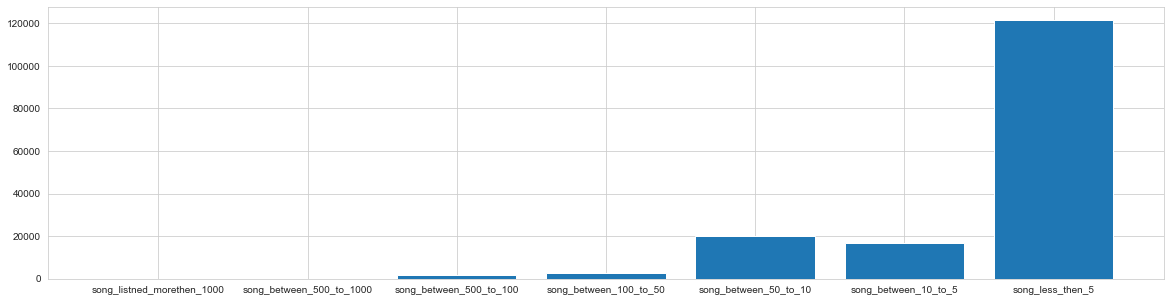

In [36]:
plt.figure(figsize=(20,5))
keys = song_data. keys()
values = song_data. values()
plt. bar(keys, values)


### Freq  

- Number of times user listned single song

In [37]:
song_df.freq.describe()                  # To get the basic staistics

count    1.450932e+06
mean     3.187151e+00
std      7.051666e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.230000e+02
Name: freq, dtype: float64

In [38]:
song_df[song_df.freq ==923]

,user_id,song_id,freq,artist_name,title
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


- maximum number of times a song is listned by user is 923
  - user id is **22bb29714137fa47083963c30e1a26f1bf517e7d**
  - song id is **SOXTUWG12AB018A2E2**

<AxesSubplot:xlabel='freq', ylabel='Density'>

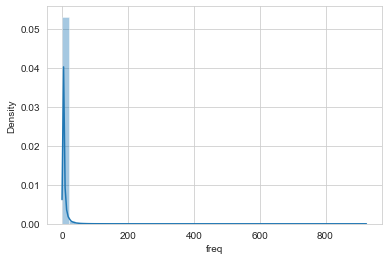

In [39]:
sns.distplot(song_df.freq,)

<Figure size 3600x288 with 0 Axes>

<AxesSubplot:>

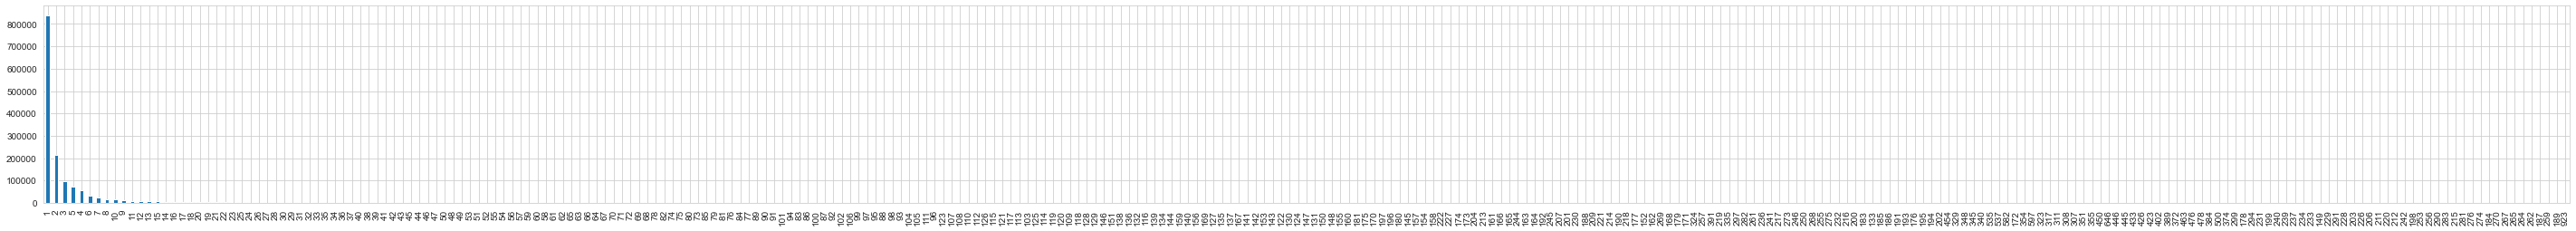

In [40]:
plt.figure(figsize=(50,4))

song_df.freq.value_counts().plot(kind='bar')

<AxesSubplot:>

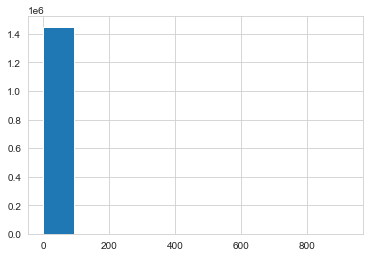

In [41]:
song_df.freq.hist()

- From the two plots we can see that the most of the songs listned in B/W 1-50

**Let's look in to the outliers**

In [42]:
def Upper_lower(col):
    Q1= np.percentile(col,25)
    Q3= np.percentile(col,75)
    IQR = Q3-Q1
    Upper = Q3+1.5*IQR
    Lower = Q1-1.5*IQR
    return(Upper,Lower)
    

In [43]:
Upper,Lower = Upper_lower(song_df.freq)
Upper,Lower

(6.0, -2.0)

In [44]:
song_df[(song_df.freq<Lower)|(song_df.freq>Upper)]

,user_id,song_id,freq,artist_name,title
28,9be82340a8b5ef32357fe5af957ccd54736ece95,SOHGGAH12A58A795BE,15,Slum Village,Climax
55,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SODBXDO12A6D4FCD4F,14,Dario Marianelli,Love Letters
62,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SOUDGEV12A8C135FC9,10,Counting Crows / Vanessa Carlton,Big Yellow Taxi
86,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,SORIWEH12A8C13D4A6,54,Was (Not Was),The Sky's Ablaze
119,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOYOMRA12A6D4F9975,11,Phil Collins,You Can't Hurry Love
...,...,...,...,...,...
1450855,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOECSYA12A8C134C34,41,Catupecu Machu,Origen Extremo
1450856,07f2f354a2a4390624e0d04e4a555ef67e98f673,SODPPBT12A8C141D90,9,Kings Of Leon,Closer
1450859,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOGMNZG12AB0182DAD,24,Veto,You Are A Knife
1450870,07f2f354a2a4390624e0d04e4a555ef67e98f673,SONGIXY12A58A7BB42,10,LCD Soundsystem,Someone Great


In [45]:
(song_df[(song_df.freq<Lower)|(song_df.freq>Upper)].shape[0]/song_df.shape[0])*100

9.770065034060865

<AxesSubplot:xlabel='freq'>

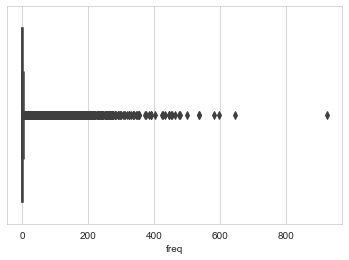

In [46]:
sns.boxplot(song_df.freq)

### Artist_name

In [47]:
artist  = pd.DataFrame(song_df.artist_name.value_counts())
artist

,artist_name
Coldplay,12279
Kings Of Leon,8514
Florence + The Machine,8213
Justin Bieber,7669
Jack Johnson,6784
...,...
Blind Boy Fuller_ Sonny Terry,1
U.P.O.,1
Cisko Kid,1
Deep Dish;Richard Morel;Brian Transeau,1


- **There are  28360 artists in the given data**

In [48]:
# The top 10 populer artists in the given data are 

artist.index[:10]

Index(['Coldplay', 'Kings Of Leon', 'Florence + The Machine', 'Justin Bieber',
       'Jack Johnson', 'Train', 'The Black Keys', 'Eminem', 'OneRepublic',
       'Muse'],
      dtype='object')

<AxesSubplot:>

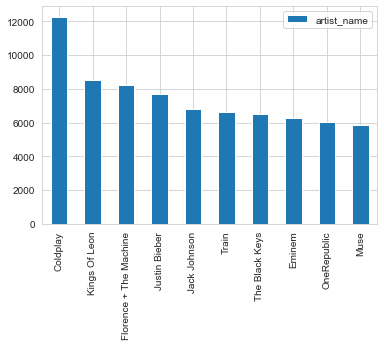

In [49]:
artist[:10].plot(kind='bar')

In [50]:
artist[artist.artist_name ==1]

,artist_name
Law,1
Siobhan McCarthy,1
Richard Burmer_ Mannheim Steamroller,1
Karen Clark Sheard feat. Yolanda Adams,1
Malevaje,1
...,...
Blind Boy Fuller_ Sonny Terry,1
U.P.O.,1
Cisko Kid,1
Deep Dish;Richard Morel;Brian Transeau,1


In [51]:
artist[artist.artist_name <3].shape[0]/artist.shape[0]

0.29862482369534554

- There are few artists who are just occoured once or twise in the given data (**nearly 30%**)

- As we no the title and song id is representing the same 

In [52]:
artist_more_then_1000 = list(artist[artist.artist_name>999].index)
artist_between_500_to_1000 = list(artist[(artist.artist_name<1000)&(artist.artist_name>500)].index)
artist_between_500_to_100= list(artist[(artist.artist_name<501)&(artist.artist_name>101)].index)
artist_between_100_to_50 = list(artist[(artist.artist_name<101)&(artist.artist_name>50)].index)
artist_between_50_to_10 = list(artist[(artist.artist_name<51)&(song_info.song_id>10)].index)
artist_between_10_to_5 = list(artist[(artist.artist_name<11)&(artist.artist_name>5)].index)
artist_less_then_5 = list(artist[(artist.artist_name<6)].index)

In [53]:
len(artist_between_100_to_50)

1806

In [54]:
artist_data = {'artist_more_then_1000': len(artist_more_then_1000),\
            "artist_between_500_to_1000":len(artist_between_500_to_1000),\
            'artist_between_500_to_100':len(artist_between_500_to_100),\
            'artist_between_100_to_50':len(artist_between_100_to_50),\
            'artist_between_50_to_10':len(artist_between_50_to_10),\
            'artist_between_10_to_5':len(artist_between_10_to_5),\
            'artist_less_then_5':len(artist_less_then_5)}

In [55]:
artist_data

{'artist_more_then_1000': 214,
 'artist_between_500_to_1000': 309,
 'artist_between_500_to_100': 1958,
 'artist_between_100_to_50': 1806,
 'artist_between_50_to_10': 0,
 'artist_between_10_to_5': 3749,
 'artist_less_then_5': 13321}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

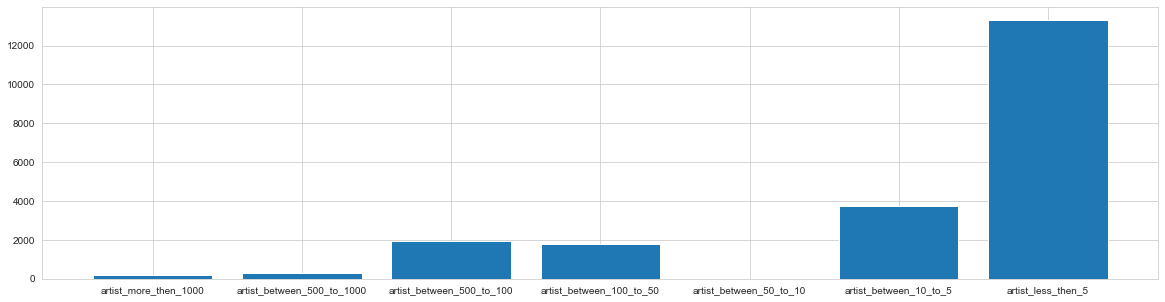

In [56]:
plt.figure(figsize=(20,5))
keys = artist_data. keys()
values = artist_data. values()
plt. bar(keys, values)


In [57]:
title_info = pd.DataFrame(song_df.title.value_counts())

In [58]:
title_info

,title
Sehr kosmisch,5043
Undo,4483
You're The One,4270
Dog Days Are Over (Radio Edit),3780
Revelry,3672
...,...
Rock And Roll Yo,1
Saved (2006 Remastered Album Version),1
JÃ¤mna Plagor,1
Another Girl_ Another Planet,1


In [59]:
title_info[:10].index

Index(['Sehr kosmisch', 'Undo', 'You're The One',
       'Dog Days Are Over (Radio Edit)', 'Revelry', 'Secrets',
       'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
       'Hey_ Soul Sister', 'Fireflies', 'Tive Sim'],
      dtype='object')

<AxesSubplot:>

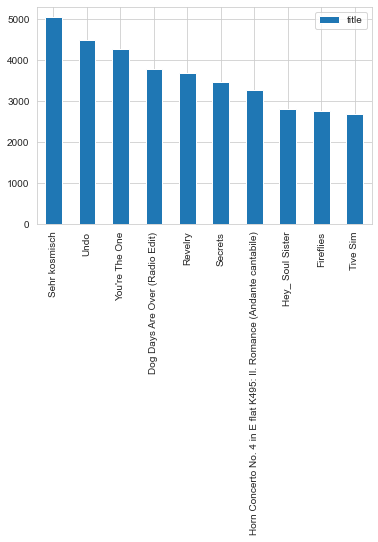

In [60]:
title_info[:10].plot(kind='bar')

- Top 10 populer songs in the data are shown in the above graph

In [61]:
title_info[title_info.title==1]

,title
Something You Got,1
Trouble Over Me,1
Devuelveme A Mi Chica,1
Don't Give Up (Album Version),1
Against The Spirits,1
...,...
Rock And Roll Yo,1
Saved (2006 Remastered Album Version),1
JÃ¤mna Plagor,1
Another Girl_ Another Planet,1


In [62]:
(title_info[title_info.title==1].shape[0]/title_info.shape[0])*100

37.21680496417828

- There are 51220  songs which are just listned once by the user in the entire data(**around 37%**)

In [64]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
